Masukkan jumlah titik data: 4
Masukkan nilai x[0]: 8.0
Masukkan rentang awal y[0]: 2.4
Masukkan rentang akhir y[0]: 2.8
Masukkan nilai x[1]: 9.0
Masukkan nilai y[1]: 2.197225
Masukkan nilai x[2]: 9.5
Masukkan nilai y[2]: 2.251292
Masukkan nilai x[3]: 11.0
Masukkan nilai y[3]: 2.397895
Masukkan rentang awal titik interpolasi: 9.3
Masukkan rentang akhir titik interpolasi: 9.40
+---------+------+-------------------+
| iterasi | x[i] |        y[i]       |
+---------+------+-------------------+
|    0    | 8.0  | 2.605149686313054 |
|    1    | 9.0  |      2.197225     |
|    2    | 9.5  |      2.251292     |
|    3    | 11.0 |      2.397895     |
+---------+------+-------------------+
Hasil interpolasi pada
 x = 9.366580673503808 adalah 2.227819045875428


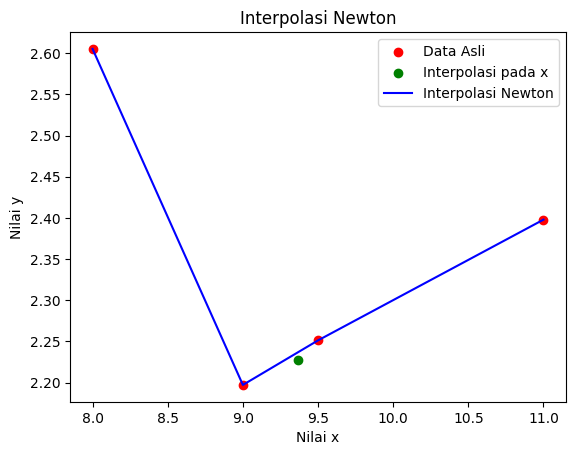

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def beda_terbagi_newton(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            F[i][j] = (F[i+1][j-1] - F[i][j-1]) / (x[i+j] - x[i])

    return F

def interpolasi_newton(x, y, x_interp):
    F = beda_terbagi_newton(x, y)
    n = len(x)
    p = F[0][0]
    x_term = 1

    for i in range(1, n):
        x_term *= (x_interp - x[i-1])
        p += F[0][i] * x_term

    return p

n = int(input("Masukkan jumlah titik data: "))
x = np.zeros(n)
y = np.zeros(n)

table = PrettyTable()
table.field_names = ["iterasi", "x[i]", "y[i]"]

for i in range(n):
    x[i] = float(input(f"Masukkan nilai x[{i}]: "))
    if i == 0:
        awal = float(input("Masukkan rentang awal y[0]: "))
        akhir = float(input("Masukkan rentang akhir y[0]: "))
        y[i] = np.random.uniform(awal, akhir)
    else:
        y[i] = float(input(f"Masukkan nilai y[{i}]: "))

    table.add_row([i, x[i], y[i]])

start_range = float(input("Masukkan rentang awal titik interpolasi: "))
end_range = float(input("Masukkan rentang akhir titik interpolasi: "))

# Menghasilkan nomor random untuk baris ketiga, kolom ketiga
x_interp = np.random.uniform(start_range, end_range)
hasil_interpolasi = interpolasi_newton(x, y, x_interp)

print(table)
print("Hasil interpolasi pada")
print(f" x = {x_interp} adalah {hasil_interpolasi}")

# Plot data asli
plt.scatter(x, y, color='red', label='Data Asli')

# Plot hasil interpolasi pada nilai x yang dicari
plt.scatter(x_interp, hasil_interpolasi, color='green', label='Interpolasi pada x')

# Plot line plot hasil interpolasi
x_vals = np.linspace(start_range, end_range, 100)
y_vals = [interpolasi_newton(x, y, val) for val in x_vals]
plt.plot(x, y, color='blue', label='Interpolasi Newton')

plt.xlabel('Nilai x')
plt.ylabel('Nilai y')
plt.title('Interpolasi Newton')
plt.legend()
plt.show()
